In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/DX

/content/drive/MyDrive/DX


##### 샘플 데이터

In [3]:
# # 코랩 konlpy 실행
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2025-05-13 05:19:55--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1 [following]
--2025-05-13 05:19:55--  https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucca7515eb7912e8c724ceaa42e0.dl.dropboxusercontent.com/cd/0/inline/CplR9m4eP93PXo0GpNXBv3np4WkNUt_PlbV_BDyplixZrhVL_cWkyDKLR-wiymTzLGgqvqnMzXW3DbPNk-tzyZi4qoD9W6Mqsjarcwu6vzQo6GzU3OTTGiuadQfzy6GSnWTpC3XoAuO1wEJ4C2ZUzBhS/file?dl=1# [following]
--2025-05-13 05:19:55--  https://ucc

In [4]:
# #kiwi
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.5/35.5 MB 63.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 30.6 MB/s eta 0:00:00
  Created wheel for kiwipiepy_model: filename=kiwipiepy_model-0.21.0-py3-none-any.whl size=35593192 sha256=762e2fa535e09edb7e8af7020405a5774658d51ea8331179992d11eb6be500b0
  Stored in directory: /root/.cache/pip/wheels/b0/16/3d/95053ab5298f0f0f22ffea6de0200b6f24bffb73cab4c1a828
Successfully built kiwipiepy_model


In [1]:
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
tqdm.pandas()
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
import glob
pkl_path = glob.glob('./lda/*.pkl')
# pkl_path = pkl_path[5:7] # 수업예제
#pkl_path # 9, 10, 11
sleep_path = pkl_path[:]
sleep_path

['./lda/Actor2_action.pkl',
 './lda/Actor0_action.pkl',
 './lda/Actor5_action.pkl',
 './lda/Actor3_action.pkl',
 './lda/Actor4_action.pkl',
 './lda/Actor1_action.pkl']

In [3]:
df = pd.DataFrame()

for p in sleep_path:
  with open(p, 'rb') as f:
    new_df = pickle.load(f)
  df = pd.concat([df, new_df])

df = df.reset_index(drop=True)

# ◆ 1. Satisfaction
* 1.1 감성사전 불러오기 (SentiWord_info.json)
* 1.2 감성점수 구하는 define 함수 만들기
* 1.3 감성점수 구하기
* 1.4 액션 별로 감성점수 계산해서 df에 추가하기

#### 1.1 감성사전 불러오기

In [5]:
import json

In [6]:
with open('SentiWord_info.json', encoding='utf-8-sig', mode = 'r') as f:
  sents_dicts = json.load(f)

#### 1.2 감성점수 구하는 define 함수 만들기

In [10]:
# 예상되는 출력값 [('좋다', '2'), ('싫다', '-2')]
def sentiment_score(sents_dicts, token_list):
  result_list = []
  for token in token_list:
    for s in sents_dicts:
      if s['word'] == token:
        result = s['word'], s['polarity']
        result_list.append(result)
  return result_list

In [11]:
# 2) word·word_root 모두 매핑하는 dict 생성
sents_map = {}
for entry in sents_dicts:
    sents_map[entry['word']] = entry['polarity']
    sents_map[entry['word_root']] = entry['polarity']

# 3) 토큰 리스트에 대해 lookup 함수 정의
def sentiment_score(token_list):
    """
    token_list 내 토큰이 sents_map에 있으면
    (토큰, polarity) 형태로 반환.
    """
    return [(tok, sents_map[tok])
            for tok in token_list
            if tok in sents_map]

In [12]:
# 4) 테스트해 보기
tokens0 = df['tagged_contents'].iloc[0]
print(tokens0)
print(sentiment_score(tokens0))
print(sentiment_score(['좋다', '싫다', '알쏭달쏭', '검색']))

['육아', '일기', '오늘', '아가', '이유식', '닭고기', '배추', '보리차', '오늘', '아가', '돌', '촬영', '날', '날씨', '또', '비', '아들', '촬영', '사진', '아들', '두번째', '컨셉', '피노키오', '유럽', '농부', '느낌', '아들', '뭘', '사실', '오전', '촬영', '잠', '온', '행운', '첫', '시작', '시작', '오후', '다시', '찍기', '김', '시간', '예약', '차', '친정', '차', '자마자', '잠', '아들', '도착', '후', '바로', '깨', '친정', '부모님', '이유식', '먹이', '스튜디오', '중', '또', '잠', '푹', '못', '자서', '걱정', '수고', '김', '돌잔치', '때', '입', '한복', '셀렉', '진주', '엠비씨', '컴', '션', '몇개', '셀렉', '스타일', '이번', '신상', '궁', '스타일', '한복', '행운', '한복', '신상', '내', '한복', '추가', '행운', '한복', '추가', '뭔가', '계속', '추가', '느낌', '한번', '신랑', '저', '스타일', '셀렉', '퍼기', '방지', '퍼기', '캡', '배송비', '보리차', '때', '준비', '행운', '굿', '아이템', '보냉', '개', '구입', '디자인', '상큼', '이번', '여름', '사용', '오늘', '아가', '이유식', '번', '저녁', '이유식', '거의', '못', '먹음', '비', '오타', '민', '유산균', '번', '비타민', '응', '목욕', '함', '오늘', '아가', '엄마', '아빠', '행복', '호랑이', '띠', '호랑이', '띠', '호랑이', '띠', '성장', '일기', '육아', '일기', '육아', '소통', '육아', '맘', '육아', '정보', '육아용품', '육아', '소통', '육아', '템', '육아', '템', '리뷰']
[('돌',

### 1.3  감성점수 구하기

#### 1.3.1 적합하게 형태소 재분리

In [13]:
from konlpy.tag import Okt
okt = Okt()

from kiwipiepy import Kiwi
kiwi = Kiwi()

In [14]:
def okt_pos_tagging(string):
  string = kiwi.space(string)
  pos_words = okt.morphs(string, norm=True, stem=True)
  return pos_words

#### 1.3.2 감정점수 적용하기
* (시간소요_1000개 기준 약 1분 30초)

In [15]:
sentiment = []
for i in tqdm(df['contents']):
  token = okt_pos_tagging(i)
  score = sentiment_score(token)
  sentiment.append(score)

100%|██████████| 52891/52891 [4:46:17<00:00,  3.08it/s]


In [16]:
import pickle

filename_pkl = 'sentiment.pkl'

# 저장
with open(filename_pkl, 'wb') as f:
    pickle.dump(sentiment, f)

print(f"'{filename_pkl}' 파일로 리스트가 피클링되어 저장되었습니다.")

'sentiment.pkl' 파일로 리스트가 피클링되어 저장되었습니다.


In [ ]:
filename_pkl = 'sentiment.pkl'

with open(filename_pkl, 'rb') as f: 
    sentiment = pickle.load(f)

print(f"피클 파일에서 불러온 리스트: {sentiment}")

In [17]:
sentiment[0]

[('울', '-2'),
 ('차', '-1'),
 ('울', '-2'),
 ('돌', '-2'),
 ('날', '-1'),
 ('가', '1'),
 ('비', '-2'),
 ('울', '-2'),
 ('귀엽다', '2'),
 ('이', '2'),
 ('울', '-2'),
 ('이쁘다', '2'),
 ('이', '2'),
 ('행운', '1'),
 ('이', '2'),
 ('찡', '-1'),
 ('찡', '-1'),
 ('로', '1'),
 ('차', '-1'),
 ('태우다', '-1'),
 ('차', '-1'),
 ('타', '-2'),
 ('이', '2'),
 ('깨', '-1'),
 ('버리다', '-2'),
 ('더', '-1'),
 ('좋다', '2'),
 ('과', '-1'),
 ('놀다', '1'),
 ('로', '1'),
 ('이', '2'),
 ('못', '-1'),
 ('걱정', '-1'),
 ('이', '2'),
 ('수고', '1'),
 ('때', '-1'),
 ('개', '-2'),
 ('궁', '-2'),
 ('행운', '1'),
 ('이', '2'),
 ('내', '-1'),
 ('원', '2'),
 ('행운', '1'),
 ('이', '2'),
 ('원', '2'),
 ('번', '0'),
 ('거', '-1'),
 ('예쁘다', '2'),
 ('저', '-1'),
 ('로', '1'),
 ('흘리다', '-1'),
 ('때', '-1'),
 ('울', '-2'),
 ('행운', '1'),
 ('이', '2'),
 ('이기다', '1'),
 ('크다', '1'),
 ('거', '-1'),
 ('거', '-1'),
 ('개', '-2'),
 ('상큼', '1'),
 ('울', '-2'),
 ('번', '0'),
 ('못', '-1'),
 ('비', '-2'),
 ('번', '0'),
 ('울', '-2'),
 ('행복', '2'),
 ('고맙다', '2'),
 ('흑', '-2'),
 ('이', '2'),
 ('띠', '-2'),

In [18]:
sum( [ int(i[1]) for i in sentiment[0]] )

-9

In [19]:
# 감성점수 더하기
sum_list = []
for s in sentiment:
  s_score = sum( [ int(i[1]) for i in s] )
  sum_list.append(s_score)

In [20]:
df['sentiment_score'] = sum_list
df.head(3)

,source,search_words,url,title,contents,tagged_contents,vector,umap_kmeans_cluster,2nd_cluster,3rd_cluster,action_cluster,sentiment_score
0,블로그,아기+잠깨,https://blog.naver.com/miyasmile/223095906074,NaN,D 313일아기 육아일기 오늘 울아가 8시쯤 일어났다. 8시35분 이유식 닭고기배추...,"[육아, 일기, 오늘, 아가, 이유식, 닭고기, 배추, 보리차, 오늘, 아가, 돌,...",[ 0.5749904 -1.1368233 -1.3840497 -0.952106...,1,-1,0,4,-9
1,블로그,아기+잠깨,https://blog.naver.com/jjinius_kwon/223094800350,NaN,똥쟁이 안꾸잉 생후 232일차 23.04.25 화 요즘 왜 이렇게 잠이 안드는지 어...,"[똥, 안꾸잉, 생후, 화, 요즘, 왜, 잠, 어제, 새벽, 편이, 각자, 거, 침...",[ 0.05704629 -0.56485105 -0.04377888 -1.117852...,5,-1,0,1,26
2,블로그,아기+잠깨,https://blog.naver.com/midor02/223097544532,NaN,강남고양이무마취전문미용샵 블랙스완 반가워요 집사님들 냥이묭사 배원장이에옹 이번에는...,"[강남고양이, 무, 마취, 미용, 블랙스완, 집사, 냥이묭사, 배, 원장, 옹, 이...",[ 1.5659806e+00 -1.3117813e+00 9.4728261e-01 ...,1,-1,0,3,61


### 1.4 전체 액터와 액션에 대해서 감성점수 평균값 계산
*감성점수는 액션별로 계산

#### 1.4.1 dict 형식으로 출력
>[예시 출력 화면]
- key(액터 액션이름) / value(평균점수)
-{'Actor1_Action1': 0.703,
- 'Actor1_Action2': 0.649,
- 'Actor0_Action1': -0.276,
- 'Actor0_Action2': -0.178}

In [21]:
action_sents = dict()

for actor in df['3rd_cluster'].unique(): # 액터 데이터프레임 필터링
  actor_df = df[df['3rd_cluster'] == actor]

  for action in actor_df['action_cluster'].unique(): # 필터링한 액터에 액션이 몇개 있는지 필터링하기 위해 unique 적용
    action_df = actor_df[actor_df['action_cluster'] == action] # 액션 필터링
    action_score = np.mean(action_df['sentiment_score']) # 평균
    action_sents[f'Actor{actor}_Action{action}'] = action_score # 딕셔너리 추가

In [23]:
action_sents

{'Actor0_Action4': np.float64(36.73529411764706),
 'Actor0_Action1': np.float64(29.875486381322958),
 'Actor0_Action3': np.float64(39.68199233716475),
 'Actor0_Action2': np.float64(32.418502202643175),
 'Actor1_Action2': np.float64(34.63651050080775),
 'Actor1_Action1': np.float64(31.15412695193673),
 'Actor1_Action6': np.float64(26.251968503937007),
 'Actor1_Action4': np.float64(33.319327731092436),
 'Actor1_Action8': np.float64(29.455555555555556),
 'Actor1_Action5': np.float64(16.63963963963964),
 'Actor1_Action7': np.float64(25.264367816091955),
 'Actor1_Action3': np.float64(25.654255319148938),
 'Actor2_Action1': np.float64(20.213620774130327),
 'Actor2_Action5': np.float64(32.63861386138614),
 'Actor2_Action4': np.float64(30.39763779527559),
 'Actor2_Action2': np.float64(43.66216216216216),
 'Actor2_Action3': np.float64(26.236292428198432),
 'Actor3_Action1': np.float64(34.312958435207825),
 'Actor3_Action2': np.float64(19.752260397830018),
 'Actor3_Action4': np.float64(0.4),
 'A

#### 1.4.2 정규화 (-10~10)
* minmaxscaler를 이용해서 정규화 : 주어진 데이터를 특정 범위로 변환(정규화)하는 데 사용
* minmaxscaler은 배열(array 데이터 형식, shape이 1이어야 작동)로 변환필요

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
data = action_sents.values()
data = np.array(list(data)).reshape(-1, 1)
data[:5]

array([[36.73529412],
       [29.87548638],
       [39.68199234],
       [32.4185022 ],
       [34.6365105 ]])

In [26]:
scaler = MinMaxScaler(feature_range=(-10, 10)) # 스케일러 선언

transformed_data = scaler.fit_transform(data) # fitting(데이터 적용)
transformed_data[:5]

array([[-8.80776313],
       [-9.00005946],
       [-8.72516034],
       [-8.92877282],
       [-8.8665969 ]])

In [27]:
score_result = transformed_data.flatten().tolist()
score_result = [round(i, 4) for i in score_result]
score_result

[-8.8078,
 -9.0001,
 -8.7252,
 -8.9288,
 -8.8666,
 -8.9642,
 -9.1016,
 -8.9035,
 -9.0118,
 -9.3711,
 -9.1293,
 -9.1184,
 -9.2709,
 -8.9226,
 -8.9854,
 -8.6136,
 -9.1021,
 -8.8757,
 -9.2838,
 -9.8263,
 10.0,
 -8.5761,
 -9.2079,
 -9.4516,
 -8.7754,
 -9.2659,
 -8.7379,
 -8.7257,
 -8.8839,
 -9.0592,
 -8.9836,
 -10.0,
 -9.5692,
 -8.5688,
 -8.7131]

In [28]:
for key, new_value in zip(action_sents.keys(), score_result):
  action_sents[key] = new_value
action_sents

{'Actor0_Action4': -8.8078,
 'Actor0_Action1': -9.0001,
 'Actor0_Action3': -8.7252,
 'Actor0_Action2': -8.9288,
 'Actor1_Action2': -8.8666,
 'Actor1_Action1': -8.9642,
 'Actor1_Action6': -9.1016,
 'Actor1_Action4': -8.9035,
 'Actor1_Action8': -9.0118,
 'Actor1_Action5': -9.3711,
 'Actor1_Action7': -9.1293,
 'Actor1_Action3': -9.1184,
 'Actor2_Action1': -9.2709,
 'Actor2_Action5': -8.9226,
 'Actor2_Action4': -8.9854,
 'Actor2_Action2': -8.6136,
 'Actor2_Action3': -9.1021,
 'Actor3_Action1': -8.8757,
 'Actor3_Action2': -9.2838,
 'Actor3_Action4': -9.8263,
 'Actor3_Action3': 10.0,
 'Actor5_Action3': -8.5761,
 'Actor5_Action10': -9.2079,
 'Actor5_Action2': -9.4516,
 'Actor5_Action4': -8.7754,
 'Actor5_Action8': -9.2659,
 'Actor5_Action1': -8.7379,
 'Actor5_Action6': -8.7257,
 'Actor5_Action7': -8.8839,
 'Actor5_Action9': -9.0592,
 'Actor5_Action5': -8.9836,
 'Actor4_Action3': -10.0,
 'Actor4_Action1': -9.5692,
 'Actor4_Action2': -8.5688,
 'Actor4_Action4': -8.7131}

In [29]:
sents_df = pd.DataFrame(action_sents.items(), columns=['Action', 'Satisfaction'])
sents_df.head()

,Action,Satisfaction
0,Actor0_Action4,-8.8078
1,Actor0_Action1,-9.0001
2,Actor0_Action3,-8.7252
3,Actor0_Action2,-8.9288
4,Actor1_Action2,-8.8666


# ◆ 2. Importance
* 2.1 importance 점수 구하기 _ 전체 토픽의 비중
* 2.2 importance 점수 정규화

### 2-1. Importance 점수 구하기

In [30]:
from collections import Counter

In [31]:
check = []
for actor, action in zip(df['3rd_cluster'], df['action_cluster']):
  check.append(f'Actor{actor}_Action{action}')

In [32]:
frequency = Counter(check)
frequency

Counter({'Actor0_Action4': 238,
         'Actor0_Action1': 257,
         'Actor0_Action3': 261,
         'Actor0_Action2': 227,
         'Actor1_Action2': 619,
         'Actor1_Action1': 4931,
         'Actor1_Action6': 127,
         'Actor1_Action4': 119,
         'Actor1_Action8': 90,
         'Actor1_Action5': 111,
         'Actor1_Action7': 87,
         'Actor1_Action3': 188,
         'Actor2_Action1': 2041,
         'Actor2_Action5': 404,
         'Actor2_Action4': 508,
         'Actor2_Action2': 962,
         'Actor2_Action3': 766,
         'Actor3_Action1': 15542,
         'Actor3_Action2': 1659,
         'Actor3_Action4': 15,
         'Actor3_Action3': 3,
         'Actor5_Action3': 545,
         'Actor5_Action10': 37,
         'Actor5_Action2': 796,
         'Actor5_Action4': 282,
         'Actor5_Action8': 69,
         'Actor5_Action1': 4613,
         'Actor5_Action6': 121,
         'Actor5_Action7': 55,
         'Actor5_Action9': 60,
         'Actor5_Action5': 147,
         '

In [33]:
# 확률로 변환
importance_dict = dict()

# 전체합
total_count = sum(frequency.values())

# 확률로 변환
for item, value in frequency.items():
  importance = (value/total_count) * 100
  importance_dict[item] = importance

In [34]:
importance_dict

{'Actor0_Action4': 0.4499820385320754,
 'Actor0_Action1': 0.4859049743812747,
 'Actor0_Action3': 0.4934676977179482,
 'Actor0_Action2': 0.4291845493562232,
 'Actor1_Action2': 1.1703314363502297,
 'Actor1_Action1': 9.322947193284302,
 'Actor1_Action6': 0.24011646593938477,
 'Actor1_Action4': 0.2249910192660377,
 'Actor1_Action8': 0.17016127507515458,
 'Actor1_Action5': 0.20986557259269062,
 'Actor1_Action7': 0.1644892325726494,
 'Actor1_Action3': 0.3554479968236562,
 'Actor2_Action1': 3.8588795825376723,
 'Actor2_Action5': 0.7638350570040271,
 'Actor2_Action4': 0.9604658637575391,
 'Actor2_Action2': 1.8188349624699853,
 'Actor2_Action3': 1.4482615189729822,
 'Actor3_Action1': 29.384961524645025,
 'Actor3_Action2': 3.1366395038853487,
 'Actor3_Action4': 0.028360212512525757,
 'Actor3_Action3': 0.0056720425025051525,
 'Actor5_Action3': 1.0304210546217694,
 'Actor5_Action10': 0.06995519086423022,
 'Actor5_Action2': 1.5049819439980339,
 'Actor5_Action4': 0.5331719952354843,
 'Actor5_Action8

### 2-2. Importance 점수 정규화(0~10)

In [35]:
data = importance_dict.values()

data = np.array(list(data)).reshape(-1,1)

In [36]:
scaler = MinMaxScaler(feature_range=(0,10))
transformed_data = scaler.fit_transform(data)
transformed_data

array([[1.51232383e-01],
       [1.63459682e-01],
       [1.66033850e-01],
       [1.44153420e-01],
       [3.96421906e-01],
       [3.17137525e+00],
       [7.97992149e-02],
       [7.46508784e-02],
       [5.59881588e-02],
       [6.95025420e-02],
       [5.40575327e-02],
       [1.19055280e-01],
       [1.31153871e+00],
       [2.58060364e-01],
       [3.24988738e-01],
       [6.17156831e-01],
       [4.91022588e-01],
       [1.00000000e+01],
       [1.06570564e+00],
       [7.72250467e-03],
       [0.00000000e+00],
       [3.48799794e-01],
       [2.18804299e-02],
       [5.10328850e-01],
       [1.79548233e-01],
       [4.24737757e-02],
       [2.96672888e+00],
       [7.59379625e-02],
       [3.34641869e-02],
       [3.66818972e-02],
       [9.26700560e-02],
       [6.27453504e-01],
       [9.55531244e+00],
       [7.41360448e-01],
       [1.54450093e-02]])

In [37]:
score_result = transformed_data.flatten().tolist()
score_result = [round(i, 4) for i in score_result]
score_result

[0.1512,
 0.1635,
 0.166,
 0.1442,
 0.3964,
 3.1714,
 0.0798,
 0.0747,
 0.056,
 0.0695,
 0.0541,
 0.1191,
 1.3115,
 0.2581,
 0.325,
 0.6172,
 0.491,
 10.0,
 1.0657,
 0.0077,
 0.0,
 0.3488,
 0.0219,
 0.5103,
 0.1795,
 0.0425,
 2.9667,
 0.0759,
 0.0335,
 0.0367,
 0.0927,
 0.6275,
 9.5553,
 0.7414,
 0.0154]

In [38]:
for key, new_value in zip(importance_dict.keys(), score_result):
  importance_dict[key] = new_value
importance_dict

{'Actor0_Action4': 0.1512,
 'Actor0_Action1': 0.1635,
 'Actor0_Action3': 0.166,
 'Actor0_Action2': 0.1442,
 'Actor1_Action2': 0.3964,
 'Actor1_Action1': 3.1714,
 'Actor1_Action6': 0.0798,
 'Actor1_Action4': 0.0747,
 'Actor1_Action8': 0.056,
 'Actor1_Action5': 0.0695,
 'Actor1_Action7': 0.0541,
 'Actor1_Action3': 0.1191,
 'Actor2_Action1': 1.3115,
 'Actor2_Action5': 0.2581,
 'Actor2_Action4': 0.325,
 'Actor2_Action2': 0.6172,
 'Actor2_Action3': 0.491,
 'Actor3_Action1': 10.0,
 'Actor3_Action2': 1.0657,
 'Actor3_Action4': 0.0077,
 'Actor3_Action3': 0.0,
 'Actor5_Action3': 0.3488,
 'Actor5_Action10': 0.0219,
 'Actor5_Action2': 0.5103,
 'Actor5_Action4': 0.1795,
 'Actor5_Action8': 0.0425,
 'Actor5_Action1': 2.9667,
 'Actor5_Action6': 0.0759,
 'Actor5_Action7': 0.0335,
 'Actor5_Action9': 0.0367,
 'Actor5_Action5': 0.0927,
 'Actor4_Action3': 0.6275,
 'Actor4_Action1': 9.5553,
 'Actor4_Action2': 0.7414,
 'Actor4_Action4': 0.0154}

In [39]:
sents_df['Importance'] = importance_dict.values()
sents_df

,Action,Satisfaction,Importance
0,Actor0_Action4,-8.8078,0.1512
1,Actor0_Action1,-9.0001,0.1635
2,Actor0_Action3,-8.7252,0.1660
3,Actor0_Action2,-8.9288,0.1442
4,Actor1_Action2,-8.8666,0.3964
5,Actor1_Action1,-8.9642,3.1714
6,Actor1_Action6,-9.1016,0.0798
7,Actor1_Action4,-8.9035,0.0747
8,Actor1_Action8,-9.0118,0.0560
9,Actor1_Action5,-9.3711,0.0695


# ◆ 3. Opportunity
* 3.1 Opportunity score
* 3.2 Opportunity area

### 3.1 Opportunity score
Opportunity = Importance + Max(Importance-Satisfaction, 0)

In [40]:
def opportunity_score(satisfaction, importance):
  result = importance + max(importance - satisfaction, 0)
  return result

In [41]:
opportunity_list = []

for s, i in zip(sents_df['Satisfaction'], sents_df['Importance']):
  score_result = opportunity_score(s, i)
  opportunity_list.append(score_result)

sents_df['opportunity_score'] = opportunity_list # 기회점수 데이터프레임에 추가
sents_df

,Action,Satisfaction,Importance,opportunity_score
0,Actor0_Action4,-8.8078,0.1512,9.1102
1,Actor0_Action1,-9.0001,0.1635,9.3271
2,Actor0_Action3,-8.7252,0.1660,9.0572
3,Actor0_Action2,-8.9288,0.1442,9.2172
4,Actor1_Action2,-8.8666,0.3964,9.6594
5,Actor1_Action1,-8.9642,3.1714,15.3070
6,Actor1_Action6,-9.1016,0.0798,9.2612
7,Actor1_Action4,-8.9035,0.0747,9.0529
8,Actor1_Action8,-9.0118,0.0560,9.1238
9,Actor1_Action5,-9.3711,0.0695,9.5101


### 3.2 Opportunity area

In [42]:
sents_df.to_csv('opportunity_score_0513.csv', encoding='utf-8-sig')

In [43]:
import matplotlib.pyplot as plt

In [44]:
!pip install matplotlib adjustText

In [45]:
from adjustText import adjust_text

In [46]:
# 데이터 세팅(액션명리스트_범례와 레이블 / 액션 수만큼의 컬러맵 / 중요도 리스트 / 만족도 리스트)
actions = sents_df['Action']
colors = np.random.rand(len(actions), 3) # rgb컬러 0~1 실수값 3개의 값의 조합
importance = sents_df['Importance']
satisfaction = sents_df['Satisfaction']

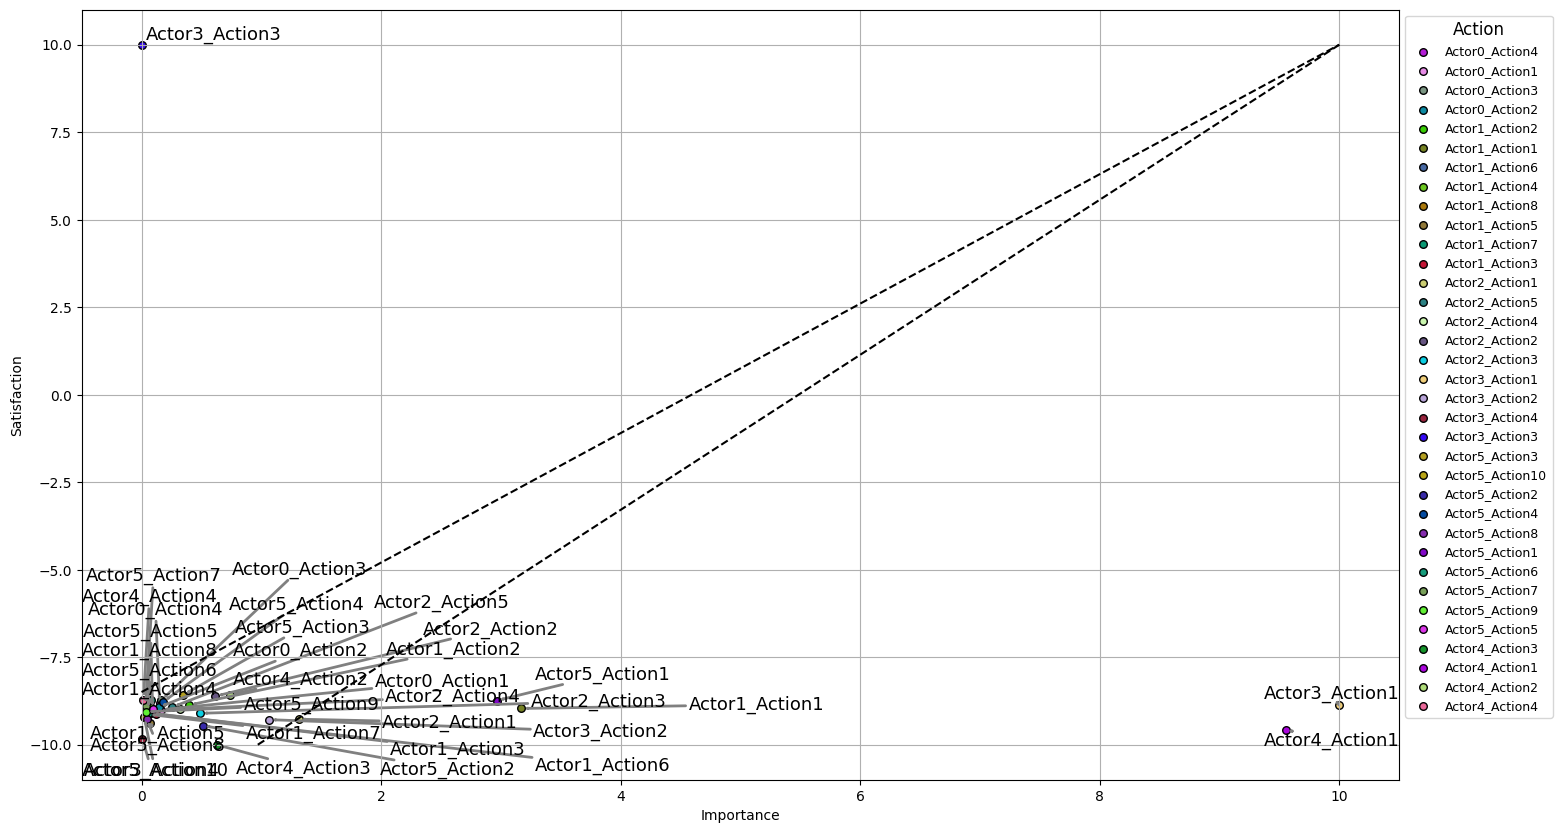

In [48]:
plt.figure(figsize = (17, 10)) # 크기

# 점찍기
for i , action in enumerate(actions):
  plt.scatter(importance[i], satisfaction[i], c = [colors[i]], label = action, s = 30, edgecolors='black')
  # s = 점의 사이즈

# 범례
plt.legend(title='Action', fontsize = 9, title_fontsize = 12, loc = 'best', bbox_to_anchor = (1,1))

plt.xlabel('Importance')
plt.ylabel('Satisfaction')

# 만족도 기준선
xdata = [0,10]
ydata = [satisfaction.mean(), 10]
plt.plot(xdata, ydata, 'k--')
# b -> 파란색 / y - 노란색 / r - 빨간색 / g - 초록색
# - : 실선 / -- : 점선 / : : 도트

# 중요도 기준선
xdata = [importance.mean(), 10]
ydata = [-10, 10]
plt.plot(xdata, ydata, 'k--')

# 텍스트 추가
texts = []
for i, action in enumerate(actions):
  texts.append(plt.text(importance[i], satisfaction[i], action, fontsize=13))

# 겹치지 않도록 텍스트 조정
adjust_text(texts, arrowprops = dict(arrowstyle='->', color = 'grey', lw=2))

# 격자
plt.grid(True)
plt.savefig('opportunity_area_0513.png')
plt.show()